<a href="https://colab.research.google.com/github/iamr7d/Auto_encoders/blob/main/Basic_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the encoder
def build_encoder(input_shape, latent_dim):
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Flatten()(encoder_input)  # Flatten input to 1D
    x = layers.Dense(128, activation='relu')(x)  # Dense layer with ReLU activation
    x = layers.Dense(latent_dim, activation='relu')(x)  # Latent space with dimensionality `latent_dim`
    encoder = models.Model(encoder_input, x, name='encoder')
    return encoder

# Define the decoder
def build_decoder(latent_dim, original_dim):
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(decoder_input)
    x = layers.Dense(np.prod(original_dim), activation='sigmoid')(x)  # Sigmoid for reconstruction
    x = layers.Reshape(original_dim)(x)  # Reshape back to the original input shape
    decoder = models.Model(decoder_input, x, name='decoder')
    return decoder

In [3]:
def build_autoencoder(input_shape, latent_dim):
    encoder = build_encoder(input_shape, latent_dim)
    decoder = build_decoder(latent_dim, input_shape)

    autoencoder_input = layers.Input(shape=input_shape)
    encoded = encoder(autoencoder_input)
    decoded = decoder(encoded)

    autoencoder = models.Model(autoencoder_input, decoded, name='autoencoder')
    return autoencoder

In [4]:
# Define input shape and latent space dimensions
input_shape = (28, 28, 1)  # For grayscale images like MNIST
latent_dim = 64  # Size of the latent space

# Build the autoencoder
autoencoder = build_autoencoder(input_shape, latent_dim)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
# Load the MNIST dataset (grayscale images of size 28x28)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the data to [0, 1] and reshape it to have a channel dimension
x_train = np.expand_dims(x_train, -1) / 255.0
x_test = np.expand_dims(x_test, -1) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0921 - val_loss: 0.0309
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0275 - val_loss: 0.0187
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0180 - val_loss: 0.0148
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0146 - val_loss: 0.0126
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0125 - val_loss: 0.0111
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0084 - val_loss: 0.0079


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


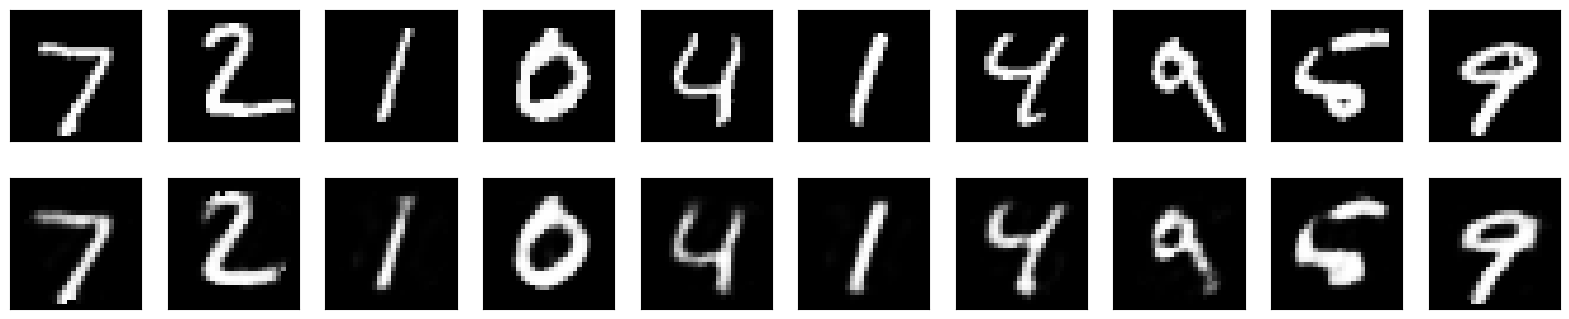

In [7]:
# Encode and decode some test images
decoded_imgs = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
def generate_new_images(decoder, latent_dim, num_images=10):
    # Generate random latent vectors (e.g., using a normal distribution)
    random_latents = np.random.normal(size=(num_images, latent_dim))

    # Use the decoder to generate images from the latent vectors
    generated_images = decoder.predict(random_latents)
    return generated_images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


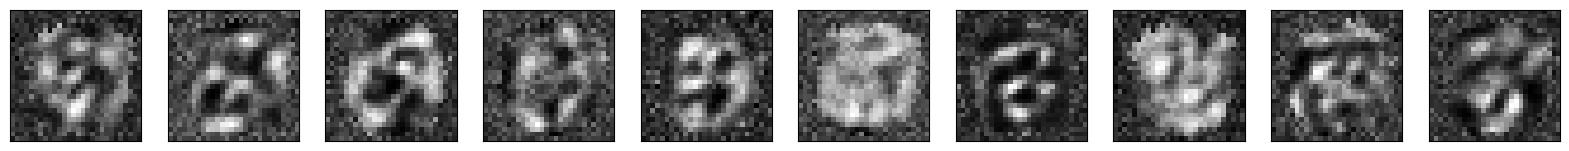

In [12]:
# Generate new images using the decoder
generated_images = generate_new_images(autoencoder.get_layer('decoder'), latent_dim)

# Display the generated images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()